In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("IQ_level.csv")

In [12]:
data = data.drop("country", axis = 1)
data = data.drop("rank", axis = 1)

Je ne prends pas en compte le pays d'origine ni le rang dans le classement.

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 0 to 107
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   IQ                     103 non-null    int64  
 1   education_expenditure  103 non-null    float64
 2   avg_income             103 non-null    float64
 3   avg_temp               103 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 4.0 KB


In [23]:
data.head()

,IQ,education_expenditure,avg_income,avg_temp
0,106,1283.0,35304.0,26.2
1,106,1340.0,40964.0,19.2
2,106,1428.0,41100.0,31.5
4,104,183.0,4654.0,19.1
5,103,1024.0,22805.0,18.2


In [6]:
import seaborn as sb

In [21]:
data = data.dropna()

Je supprime les données non renseignées

<Axes: >

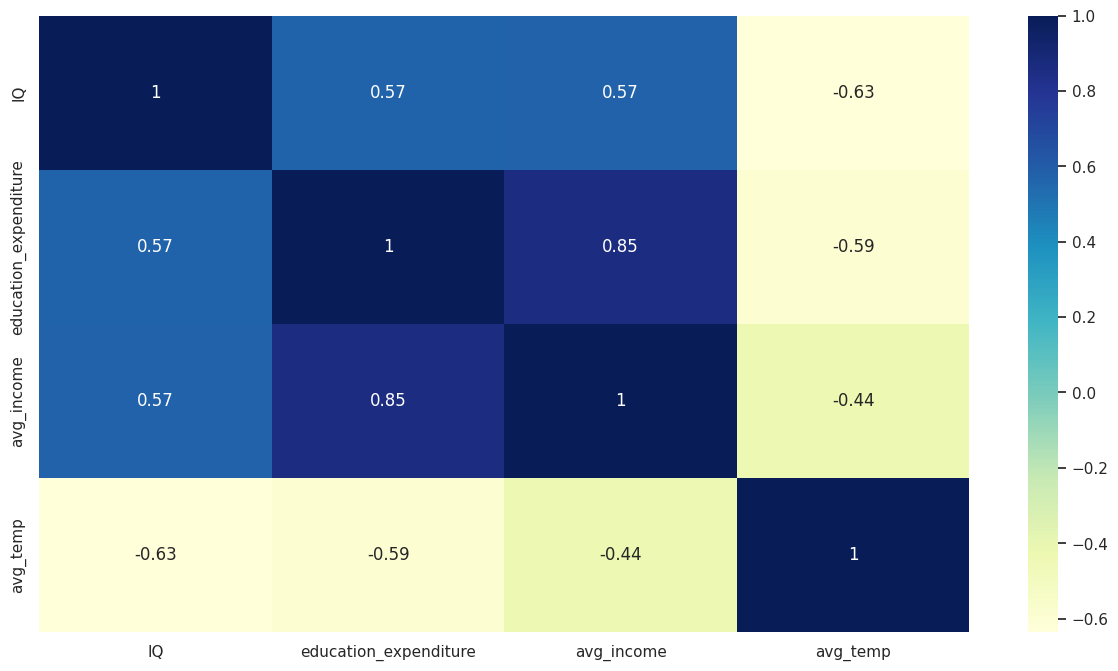

In [22]:
sb.set(rc={"figure.figsize" : (15,8)})
sb.heatmap(data.corr(), annot=True, cmap="YlGnBu")

On trouve comme facteurs corrélateurs au QI les revenus moyens par habitant dans le pays, les dépenses dans l'éducation par habitant, et la température. Il semblerait d'après ce graphique que plus les revenus augmentent, plus les dépenses dans l'éducation ont de chance d'être plus élevées et plus le QI moyen augmente.
En complément, il semblerait qu'il y ait une corrélation négative significative entre la température et le QI (plus il fait froid, plus le QI est élevé).

Je fais donc un modèle du QI en fonction des dépenses dans l'éducation et un modèle du QI en fonction de la température.

In [33]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
TempModel = LinearRegression()

In [26]:
X = data["IQ"]
Y = data["education_expenditure"]
Z = data["avg_temp"]

In [35]:
IQ = X.values.reshape(-1,1)
Money = Y.values.reshape(-1,1)
Temp = Z.values.reshape(-1,1)

In [36]:
model.fit(Money, IQ)

LinearRegression()

In [37]:
model.score(Money, IQ)

0.32289307609769424

In [38]:
TempModel.fit(Temp, IQ)

LinearRegression()

In [40]:
TempModel.score(Temp, IQ)

0.40278455113711176

<Axes: xlabel='avg_temp', ylabel='IQ'>

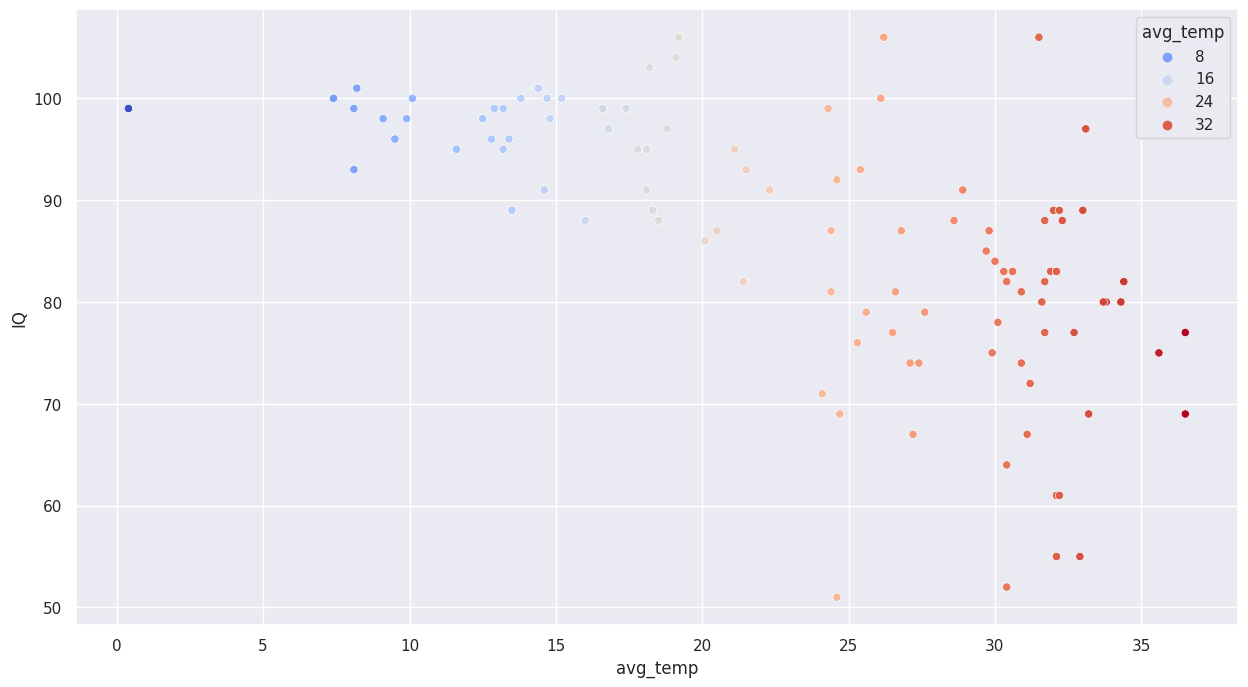

In [49]:
sb.scatterplot(x="avg_temp", y="IQ", data=data, hue="avg_temp", palette="coolwarm")

<Axes: xlabel='education_expenditure', ylabel='IQ'>

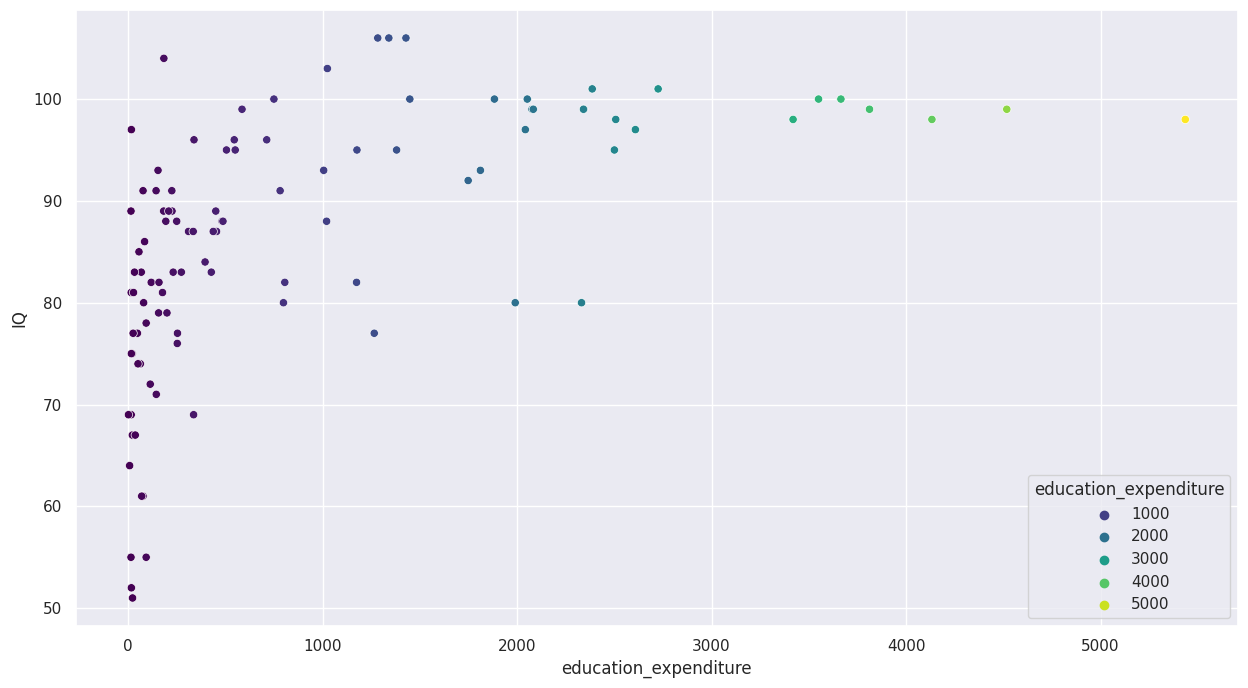

In [51]:
sb.scatterplot(x="education_expenditure", y="IQ", data=data, hue="education_expenditure", palette ="viridis")